二項分布に関する裾確率

In [59]:
from scipy.stats import binom

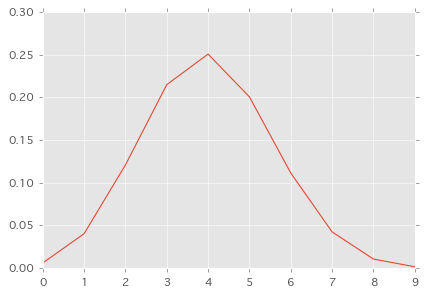

In [82]:
x = np.arange(0, 10)
y = binom.pmf(x, 10, 0.4)
plt.plot(x, y)

$ p(a, n^+, n) := 1 - F_B(n+ - 1; n, a) $

In [ ]:
a = 0.4

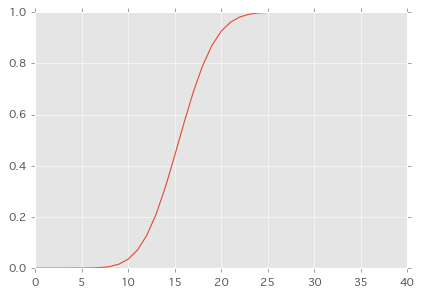

In [114]:
x = np.arange(0, 40)
y = binom.cdf(x, 40, 0.4)
plt.plot(x, y)

In [99]:
def calc_p_by_cdf(n_plus, n, a):
    return 1 - binom.cdf(n_plus - 1, n, a)

In [112]:
list_n_plus = np.arange(0, 50)
y = []
for n_plus in list_n_plus:
    y.append(calc_p_by_cdf(n_plus, 50, 0.4))

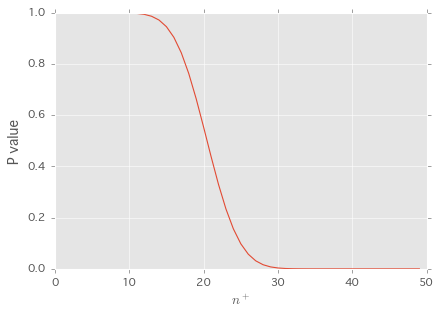

In [113]:
plt.plot(list_n_plus, y)
plt.ylabel('P value')
plt.xlabel('$n^+$')
# 

In [119]:
np.arange(1, 7).mean()/2

1.75